<a href="https://colab.research.google.com/github/nick1287/Airlines/blob/main/Airlines%2BProyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Adquisition y Análisis del dataset

In [1]:
# Instalar algortimo de agrupamiento HDBScan
!pip install umap-learn hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 2.8 MB/s 
     |████████████████████████████████| 5.2 MB 36.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1 MB 50.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=313a2eb6488ca54de1505fd1de8743b03cd1c2ff77dd4cdb34d0228657252ae1
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=adcefb7f863ea207f74e7d6eae370fff6cb71474ec7fbab22f01044e1d598b89
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x

In [3]:
# importación de librerías a utilizar.
import pandas as pd
import numpy as np

# Herramientas de visualizacion
import matplotlib.pyplot as plt # herramienta de visualizacion
import seaborn as sns # herramienta de visualizacion
import plotly.express as px # herramienta de visualizacion

# Herramientas de procesamiento
from sklearn.preprocessing import OneHotEncoder # Para hacer una clasificacion binaria de las variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Preparacion del modelo de seleccion
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold #Herramienta de validacion simple

#Algoritmos de aprendizaje supervisado de clasificacion
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Evaluacion de desempeño de algoritmos de aprendizaje supervisado de clasificacion
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

##Algoritmos de aprendizaje supervisado de regresion
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Evaluacion de desempeño de algoritmos de aprendizaje supervisado de regresion
from sklearn import metrics

#Hypertuning utilizando grid search
from sklearn.model_selection import GridSearchCV

##Algoritmos de agrupamiento
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from hdbscan import HDBSCAN

# Evita mensajes de error
import warnings
warnings.filterwarnings("ignore")

TypeError: ignored

In [ ]:
# creación del DataFrame 'df' mediante la lectura del archivo .csv
df = pd.read_csv('Airlines.csv',index_col=0)

In [ ]:
# vista del data frame
df.head()

In [ ]:
# se visualiza la nueva forma del dataframe a utilizar.
df.shape

In [ ]:
# se obtiene la información sobre registros válidos y tipo de datos de las columnas.
df.info()

Los datos en todas sus columnas son completos por lo que nos informa que podemos tomar todos y cada uno de los registros como validos.

# Data Wrangling

Debido a que todos los registros son validos, no es necesario limpiar las variables.
Pero el dataframe anteriormente mostrado no es el definitivo, primero estudiaremos las variables para hacerle las modificaciones necesarias para nuestro estudio.

# Data Visualization

## Analisis univariado

In [ ]:
# descripcion rapida del DF
df.describe().T

In [ ]:
# Conteo de valores unicos de las variables
df.nunique(axis=0)

### NUMERICAL DATA VISUALIZATION

In [ ]:
sns.histplot(data=df, x='Time')
plt.title('Distribucion por tiempo')
plt.show()

In [ ]:
sns.histplot(data=df, x='Length')
plt.title('Distribucion por distancia de vuelo')
plt.show()

### CATEGORICAL DATA VISUALIZATION AND DATA CLEANING

Variables categoricas:
+ Airline          18 Aerolineas
+ Flight no se tomara como significativa por es el nombre del vuelo.
+ AirportFrom     290 Aeropuertos origen
+ AirportTo       290 Aeropuestos destino
+ DayOfWeek         7 dias de la semana

In [ ]:
df = df.drop(['Flight'],axis=1)
df.head(1)

In [ ]:
# Conteo de llegas a tiempo como 0 y llegadas tarde como 1
plt.figure(figsize=(5,5))
sns.countplot(data=df,x=df['Delay'])
plt.title('Conteos de llegadas a tiempos y demoras')
plt.show()

In [ ]:
# Conteo por dia de la semana
plt.figure(figsize=(5,5))
sns.countplot(data=df,x=df['DayOfWeek'])
plt.title('Distribucion por dia de la semana')
plt.show()

Dia 1 = Domingo y asi sucesivamente.

In [ ]:
# Distribucion por aerolinea
plt.figure(figsize=(10,10))
sns.countplot(data=df,x=df['Airline'])
plt.title('Distribucion por aerolinea')
plt.show()

In [ ]:
# Distribucion de los aeropuertos por origen
plt.figure(figsize=(10,10))
sns.countplot(data=df,x=df['AirportFrom'])
plt.title('Distribucion por aeropuerto origen')
plt.show()

Para mejorar los procesos agruparemos los aeropuertos menos significativos ahorrandonos categorias.

In [ ]:
airfrom = df['AirportFrom'].value_counts() #Hago un conteo de los aeropuestos origen mas importantes
plt.figure(figsize=(5,5))
plt.plot(range(len(airfrom)), airfrom) #grafica de la cantidad de aeropuertos acumulativo
plt.xlabel('Cantidad de aeropuertos acumulativo')
plt.ylabel('Conteo de filas por aeropuerto origen')

In [ ]:
# En la grafica enterior se puede apreciar que a partir de 50 aeropuertos la cantidad acumulada en vuelos no es significativa
df['AirportFrom'] = df['AirportFrom'].apply(lambda s: s if str(s) in airfrom[:50] else 'others') #clasifico los aeropuertos restante como 'others'

In [ ]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='AirportFrom')
plt.xticks(rotation=90)
plt.title('Distribucion por aeropuerto origen')
plt.show()

In [ ]:
# Distribucion de los aeropuertos por destino
plt.figure(figsize=(10,10))
sns.countplot(data=df,x=df['AirportTo'])
plt.title('Distribucion por aeropuerto destino')
plt.show()

Se realizan los mismos pasos que AirportFrom para AirportTo

In [ ]:
airto = df['AirportTo'].value_counts() #Hago un conteo de los aeropuestos destino mas importantes
plt.figure(figsize=(5,5))
plt.plot(range(len(airto)), airto) #grafica de la cantidad de aeropuertos por fila
plt.xlabel('Cantidad de aeropuertos acumulativo')
plt.ylabel('Conteo de filas por aeropuerto destino')

In [ ]:
df['AirportTo'] = df['AirportTo'].apply(lambda s: s if str(s) in airto[:50] else 'others')

In [ ]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='AirportTo')
plt.title('Distribucion por aeropuerto destino')
plt.xticks(rotation=90)
plt.show()

## Análisis Multivariado

En este apartado se comienza generando la matriz de correlación de manera de entender cómo las variables se relacionan entre sí. También servirá para identificar si algunas variables pueden ser utilizadas para predecir los valores de otras.

### NUMERICAL DATA VISUALIZATION

In [ ]:
# se utiliza el método corr() para mostrar la relaciones entre todas las variables.
df.corr()

Se puede deducir por los valores que no existe correlacion entre las ninguna variable.

In [ ]:
# aquí se muestra gráficamente la relación entre las variables.
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot = True, cmap = 'bone')
plt.title('Heatmap for the Dataset', fontsize = 15)
plt.show()

Extrañamente no existe relacion entre Time(tiempo de vuelo) y Length (largo de vuelo). Mientras mas grande sea la distancia mayor deberia ser la duracion del vuelo. Puede significar que los vuelos cortos tengan demoras y los vuelos largos tengan mejor desempeño.

In [ ]:
# delay vs length
plt.figure(figsize=(10,5))
sns.violinplot(df['Delay'], df['Length'], palette = 'colorblind')
plt.title('Relación entre delay y length')
plt.show()
plt.figure(figsize=(20,5))
sns.histplot(data=df, x='Length', hue='Delay', kde=True, palette=['red','blue'])
plt.title('Relación entre delay y length')
plt.show()

Se puede deducir que el largo del vuelo no tiene un alto impacto en la demora. Levemente se puede notar que mientras los vuelos son mas cortos tienden a aumentar la cantidad demoras.

In [ ]:
# delay vs time
plt.figure(figsize=(10,5))
sns.violinplot(df['Delay'], df['Time'], palette = 'colorblind')
plt.title('Relación entre delay y time')
plt.show()
plt.figure(figsize=(20,5))
sns.histplot(data=df, x='Time', hue='Delay', kde=True, palette=['red','blue'])
plt.title('Relación entre delay y time')
plt.show()

Se puede deducir la duracion del vuelo tiene un leve impacto en la demora. Mientras mas corto es el viaje existen mas probalidades de que el vuelo se retraze.
Esto puede significar que los tiempo estimados de llegada pueden ser absorbidos por la velocidad del vuelo, y dado que en los vuelos cortos no existe mucha duracion no se llegan a absorber las demoras o simplemente que sobreestiman los tiempos de llegada en los vuelos largos.


In [ ]:
# length vs time
plt.figure(figsize=(15,15))
sns.scatterplot(df['Time'], df['Length'], palette = 'colorblind', hue = df['Delay'])
plt.title('Relación entre length y time')
plt.show()

### CATEGORICAL DATA VISUALIZATION

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x=df['Airline'],hue='Delay')
plt.title('Distibucion por Airline')
plt.show()

Esta es una variable importante a tomar en cuenta por que cada aerolinea tiene en desempeño distinto en su gestion.

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x=df['DayOfWeek'],hue='Delay')
plt.title('Distibucion por Airline')
plt.show()

Los dias de la semana como vemos en su mayoria son muy parecidos se considerara, pero no tiene factores estacionales semanales que induscan a un problable retrazo del vuelo.

In [ ]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='AirportFrom', hue='Delay')
plt.xticks(rotation=90)
plt.title('Distibucion por aeropuerto origen')
plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='AirportTo', hue='Delay')
plt.xticks(rotation=90)
plt.title('Distibucion por aeropuerto destino')
plt.show()

# Data Wrangling 2

Tranformamos las variables categoricas en variables numericas para considerarlas en nuestro estudio.

In [ ]:
df.head()

In [ ]:
OHE = OneHotEncoder(handle_unknown='ignore', #ponemos ignore para poder ommitir cuando puede pasar que no exista los mismos valores 
                    sparse=False) # generarlo como matriz para poder generar las columnas adecuadas

In [ ]:
OHE.fit(df[['AirportFrom','Airline','AirportTo','DayOfWeek']])

In [ ]:
def get_ohe(df):
    temp_df = pd.DataFrame(data=OHE.transform(df[['AirportFrom','Airline','AirportTo','DayOfWeek']]), columns=OHE.get_feature_names_out())
    C = df
    C = pd.concat([C.reset_index(drop=True), temp_df], axis=1)
    return C

In [ ]:
df_allvariables = get_ohe(df)
df_allvariables

In [ ]:
df_ovn = df_allvariables.drop(columns=['AirportFrom','Airline','AirportTo','DayOfWeek'],axis=1)
df_ovn # ovn = only variable numeric

,Time,Length,Delay,AirportFrom_ABQ,AirportFrom_ATL,AirportFrom_AUS,AirportFrom_BNA,AirportFrom_BOS,AirportFrom_BWI,AirportFrom_CLE,...,AirportTo_STL,AirportTo_TPA,AirportTo_others,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,15,205,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,15,222,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,20,165,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,20,195,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,30,202,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,1439,326,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
539379,1439,305,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
539380,1439,255,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
539381,1439,313,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Modelos supervisados de Clasificacion

Se aplicaran diversos modelos de clasificacion para determinar cual es el mas eficaz, tiendo encuenta el accuracy. Se aplicaran los siguientes modelos:
* Árboles de decisión
* Random Forest
* KNN / K-nearest-neighbor
* Regresion logistica
* SVM - Support vector machines



*Para KNN y SVM se consideraran dos variables , Time y Length*
*Para KNN se tomaran 200.000 registros mientras que para SVM se tomaran 25.000 registros*

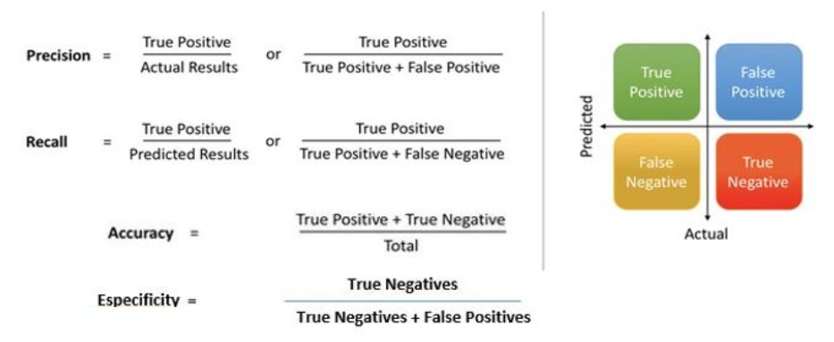

## Preprocesamiento Machine Learning - Modelo de Clasificación

* Separar los features en X e y 

In [ ]:
X = df_ovn.drop('Delay',axis=1)
y = df_ovn['Delay']

* Estandarizar el conjunto de datos

Mediante el uso de RobustScaler(), podemos eliminar los valores atípicos y luego usar StandardScaler o MinMaxScaler para preprocesar el conjunto de datos. 

In [ ]:
robust = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(10.0, 90.0), copy=True, )
X_robust = robust.fit_transform(X)

Antes de crear un modelo, necesitamos estandarizar nuestras características independientes usando el método standardScaler de scikit-learn.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_robust)

In [ ]:
X = pd.DataFrame(X_scaled, columns = X.columns) #Convierto los datos de nuevo en un dataframe

* Separar los datos en Train (70 %) y Test (30 %) con un random_state=12.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Creo dos variables para ir guardan los accuracy

In [ ]:
resultados=[]
training=[]

### Árboles de decisión

1. Creo modelo

In [ ]:
model = DecisionTreeClassifier(max_depth=3)

2. Entreno

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

3. Predigo

In [ ]:
y_train_pred = model.predict(X_train) #Predicción en Train
y_test_pred = model.predict(X_test) #Predicción en Test

4. Evaluo

In [ ]:
train_accuracy = accuracy_score(y_train,y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test,y_test_pred) # Métrica en test
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.6339214535117264


5. Guardo resultados

In [ ]:
resultados.append(test_accuracy)
training.append(train_accuracy)

### Random Forest

1. Creo modelo

In [ ]:
model = RandomForestClassifier()

2. Entreno

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier()

3. Predigo

In [ ]:
y_train_pred = model.predict(X_train) #Predicción en Train
y_test_pred = model.predict(X_test) #Predicción en Test

4. Evaluo

In [ ]:
train_accuracy = accuracy_score(y_train,y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test,y_test_pred) # Métrica en test
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.6139974662423138


5. Guardo resultados

In [ ]:
resultados.append(test_accuracy)
training.append(train_accuracy)

### KNN / K-nearest-neighbor



1. Creo modelo

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)

2. Entreno

In [ ]:
model.fit(X_train.iloc[0:200000,0:2],y_train.iloc[0:200000])

KNeighborsClassifier(n_neighbors=3)

3. Predigo

In [ ]:
y_train_pred = model.predict(X_train.iloc[:,0:2]) #Predicción en Train
y_test_pred = model.predict(X_test.iloc[:,0:2]) #Predicción en Test

4. Evaluo

In [ ]:
train_accuracy = accuracy_score(y_train,y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test,y_test_pred) # Métrica en test
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.5903531811018756


5. Guardo resultados

In [ ]:
resultados.append(test_accuracy)
training.append(train_accuracy)

### Regresion logistica

1. Creo modelo

In [ ]:
model = LogisticRegression()

2. Entreno

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

3. Predigo

In [ ]:
y_train_pred = model.predict(X_train) #Predicción en Train
y_test_pred = model.predict(X_test) #Predicción en Test

4. Evaluo

In [ ]:
train_accuracy = accuracy_score(y_train,y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test,y_test_pred) # Métrica en test
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.6423013935667274


5. Guardo resultados

In [ ]:
resultados.append(test_accuracy)
training.append(train_accuracy)

### SVM - Support vector machines

1. Creo modelo

In [ ]:
model = SVC()

2. Entreno

In [ ]:
model.fit(X_train.iloc[0:25000,0:2],y_train.iloc[0:25000])

SVC()

3. Predigo

In [ ]:
y_train_pred = model.predict(X_train.iloc[0:25000,0:2]) #Predicción en Train
y_test_pred = model.predict(X_test.iloc[0:25000,0:2]) #Predicción en Test

4. Evaluo

In [ ]:
train_accuracy = accuracy_score(y_train.iloc[0:25000],y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test.iloc[0:25000],y_test_pred) # Métrica en test
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.581


5. Guardo resultados

In [ ]:
resultados.append(test_accuracy)
training.append(train_accuracy)

## Resultados

In [ ]:
resultados
df_resultados = pd.DataFrame(resultados,index=['tree','RF','kNN','LogReg','SVM'], columns=['Test'])
df_resultados['Training']=training
df_resultados['Dif']=df_resultados.Test - df_resultados.Training
df_resultados

,Test,Training,Dif
tree,0.633921,0.632212,0.001710
RF,0.613997,0.832271,-0.218274
kNN,0.590353,0.628594,-0.038241
LogReg,0.642301,0.642054,0.000248
SVM,0.581000,0.579360,0.001640


Text(0.5, 1.0, 'Accuracy en modelos de clasificación')

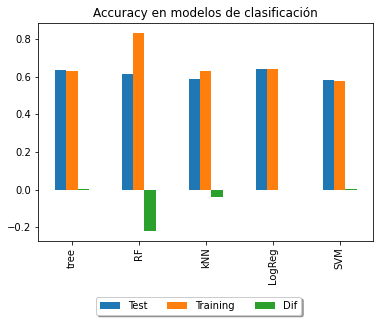

In [ ]:
axes = df_resultados.plot.bar()
axes.legend(loc=7, bbox_to_anchor=(0.8, -0.3),
          fancybox=True, shadow=True, ncol=3) # Para acomodar la leyenda
axes.set_title('Accuracy en modelos de clasificación') #TItulo


## Eleccion del modelo Random Forest y aplicacion de Hypertuning

### Elegimos como modelo Random Forest y realizamos el Hypertuning de parametros, con la ayuda tambien de la herramienta de validacion simple Stratified-KFold

In [ ]:
 #Instanciamos el modelo
random_forest = RandomForestClassifier(random_state=1)

In [ ]:
#Definimos los parámetros de búsqueda
params = {
    'n_estimators' : [100, 300],
    'max_features': [2,3],
    'max_depth'   : [5, 20]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'accuracy', 
                                  cv=StratifiedKFold().split(X_train, y_train), # Validacion simple
                                  verbose = 1, # 1-Muestra información en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [ ]:
#Entrenamos el modelo
grid_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fcf92a0ea50>,
             estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 20], 'max_features': [2, 3],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_random_forest.cv_results_['params']

[{'max_depth': 5, 'max_features': 2, 'n_estimators': 100},
 {'max_depth': 5, 'max_features': 2, 'n_estimators': 300},
 {'max_depth': 5, 'max_features': 3, 'n_estimators': 100},
 {'max_depth': 5, 'max_features': 3, 'n_estimators': 300},
 {'max_depth': 20, 'max_features': 2, 'n_estimators': 100},
 {'max_depth': 20, 'max_features': 2, 'n_estimators': 300},
 {'max_depth': 20, 'max_features': 3, 'n_estimators': 100},
 {'max_depth': 20, 'max_features': 3, 'n_estimators': 300}]

In [ ]:
#Obtenemos el mejor modelo
grid_random_forest.best_params_

{'max_depth': 20, 'max_features': 3, 'n_estimators': 300}

In [ ]:
mejor_modelo = grid_random_forest.best_estimator_
print(accuracy_score(y_test, mejor_modelo.predict(X_test)))

0.645619998146031


In [ ]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": mejor_modelo.feature_importances_}
).sort_values("importance", ascending=False).head(10)

# Mostrar
feature_importances_df

,feature,importance
0,Time,0.279507
68,Airline_WN,0.164659
1,Length,0.114616
52,AirportFrom_others,0.021249
70,Airline_YV,0.019521
67,Airline_US,0.016564
61,Airline_FL,0.015931
29,AirportFrom_MDW,0.014457
66,Airline_UA,0.014443
126,DayOfWeek_5,0.012650


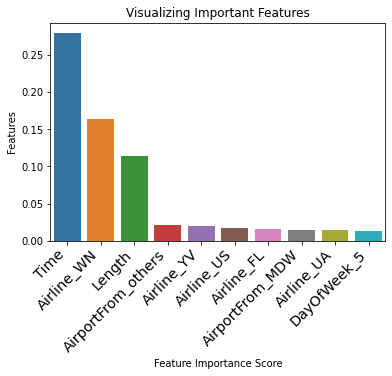

In [ ]:
# visualizar características importantes

# Crear un diagrama de barras
sns.barplot(x=feature_importances_df['feature'], y=feature_importances_df['importance'])
# agregar estiquestas

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

Se puede observar que el algoritmo reconocio el aeropuerto que mas demoras presentaba (grafico de abajo), ya que las demas en su mayoria eran muy parecidas. Las variables categoricas en este algoritmo se vuelven muy importantes.

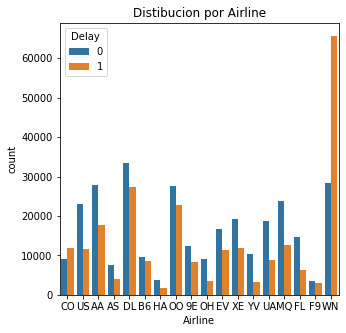

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x=df['Airline'],hue='Delay')
plt.title('Distibucion por Airline')
plt.show()

Comparativa con Random Forest con Hypertuning

In [ ]:
y_train_pred = mejor_modelo.predict(X_train) #Predicción en Train
y_test_pred = mejor_modelo.predict(X_test) #Predicción en Test

In [ ]:
train_accuracy = accuracy_score(y_train,y_train_pred) # Métrica en train
test_accuracy = accuracy_score(y_test,y_test_pred) # Métrica en test

In [ ]:
resultados.append(test_accuracy)
training.append(train_accuracy)

In [ ]:
resultados
df_resultados = pd.DataFrame(resultados,index=['tree','RF','kNN','LogReg','SVM','RF con H'], columns=['Test'])
df_resultados['Training']=training
df_resultados['Dif']=df_resultados.Test - df_resultados.Training
df_resultados

,Test,Training,Dif
tree,0.633921,0.632212,0.001710
RF,0.613997,0.832271,-0.218274
kNN,0.590353,0.628594,-0.038241
LogReg,0.642301,0.642054,0.000248
SVM,0.581000,0.579360,0.001640
RF con H,0.645620,0.666834,-0.021214


## Evaluar los indicadores de desempeño predictivo del modelo

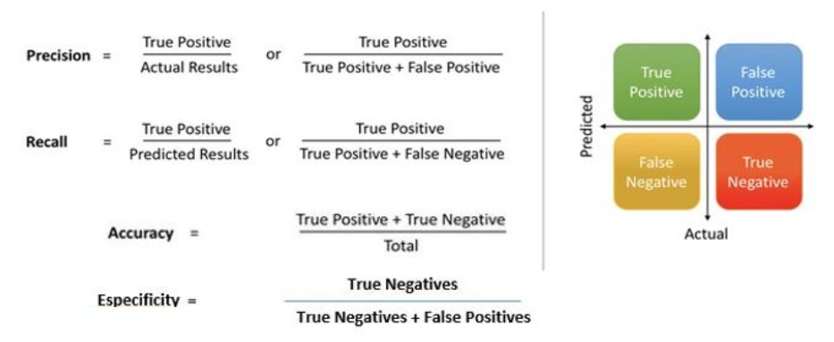

1. Calcular la métrica Accuracy.

In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.645619998146031


2. Crear la Matriz de Confusión

[[81236  8669]
 [48675 23235]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


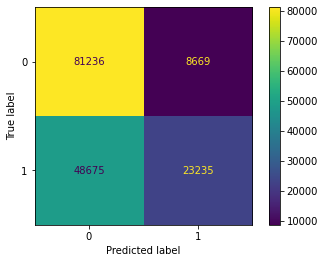

In [ ]:
#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(mejor_modelo, X_test, y_test)
plt.show()

3. Calcular la métrica Precision

In [ ]:
print(f"Precision Score of the classifier is: {precision_score(y_test, y_test_pred)}")

Precision Score of the classifier is: 0.7282785857572718


4. Calcular la métrica Recall

In [ ]:
print(f"Recall Score of the classifier is: {recall_score(y_test, y_test_pred)}")

Recall Score of the classifier is: 0.3231122236128494


5. Calcular la métrica F1 score (Especificity)

In [ ]:
print(f"F1 Score of the classifier is: {f1_score(y_test, y_test_pred)}")

F1 Score of the classifier is: 0.44762748762209337


6. Calcular y plotear la Curva ROC

AUC for our classifier is: 0.7039728607363336


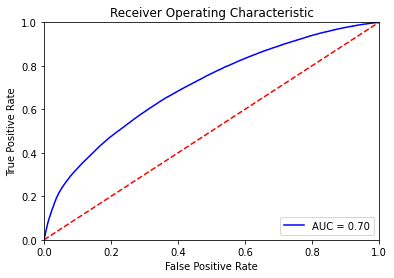

In [ ]:
class_probabilities = mejor_modelo.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Modelos supervisados de Regresion

Se aplicaran diversos modelos de regresion para estimar los tiempos de duracion del vuelo en funcion de largo del vuelo. Se considerando tambien la variable Delay, para mejorar la estimacion. Los modelos que se tomaran son:
* LinearRegression
* Random ForestRegressor con Hypertuning de parametros

Considerando como medida de comparacion:
* Mean Absolute Error
* Mean Squared Error
* Root Mean Squared Error
* Max Absolute Error
* Coefficient of determination

## Preprocesamiento Machine Learning - Modelo de Regresion

* Separar los features en X e y 

In [ ]:
X = df_ovn[['Length','Delay']]
y = df_ovn['Time']

* Separar los datos en Train (70 %) y Test (30 %) con un random_state=12.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

Creo dos variables para ir guardan los accuracy

In [ ]:
LR = []
RFR = []

In [ ]:
X_train.head()

,Length,Delay
198428,72,0
490944,160,0
134901,382,0
121276,270,0
253619,79,0


### LinearRegression

1. Creo modelo

In [ ]:
regressorLR = LinearRegression()

2. Entreno

In [ ]:
regressorLR.fit(X_train, y_train)

LinearRegression()

3. Predigo

In [ ]:
y_test_pred = regressorLR.predict(X_test)

4. Evaluo

In [ ]:
MAE = metrics.mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', MAE)

MSE = metrics.mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', MSE)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', RMSE)

MAXAE = metrics.max_error(y_test,y_test_pred)
print('Max Absolute Error: ', MAXAE)

COD = metrics.r2_score(y_test,y_test_pred)
print('Coefficient of determination: ', COD)

Mean Absolute Error: 234.91220295480892
Mean Squared Error: 75683.63678708968
Root Mean Squared Error: 275.10659168236896
Max Absolute Error:  828.4431224926002
Coefficient of determination:  0.022770758828284166


5. Guardo resultados

In [ ]:
LR.append(MAE)
LR.append(MSE)
LR.append(RMSE)
LR.append(MAXAE)
LR.append(COD)

### Random ForestRegressor con Hypertuning de parametros

1. Creo modelo

In [ ]:
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [3,5]
}
regr = RandomForestRegressor(random_state=12)

regressor = GridSearchCV(regr, parameters)

2. Entreno

In [ ]:
regressor.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=12),
             param_grid={'max_depth': [3, 5], 'n_estimators': [100, 200]})

3. Predigo con el mejor modelo

In [ ]:
mejor_modelo = regressor.best_estimator_
y_test_pred = mejor_modelo.predict(X_test)

4. Evaluo

In [ ]:
MAE = metrics.mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', MAE)

MSE = metrics.mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', MSE)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', RMSE)

MAXAE = metrics.max_error(y_test,y_test_pred)
print('Max Absolute Error: ', MAXAE)

COD = metrics.r2_score(y_test,y_test_pred)
print('Coefficient of determination: ', COD)

Mean Absolute Error: 234.0061371488798
Mean Squared Error: 75085.35995265585
Root Mean Squared Error: 274.01707967324927
Max Absolute Error:  846.8699427849116
Coefficient of determination:  0.030495726096560483


5. Guardo resultados

In [ ]:
RFR.append(MAE)
RFR.append(MSE)
RFR.append(RMSE)
RFR.append(MAXAE)
RFR.append(COD)

## Resultados

* Comparacion entre Linear Regressor y Random Forest Regressor

In [ ]:
resultados
df_resultados = pd.DataFrame(LR,index=['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error',
                                               'Max Absolute Error','Coefficient of determination'],
                              columns=['LinearRegression'])
df_resultados['RandomForestRegressor']=RFR
df_resultados

,LinearRegression,RandomForestRegressor
Mean Absolute Error,234.912203,234.006137
Mean Squared Error,75683.636787,75085.359953
Root Mean Squared Error,275.106592,274.017080
Max Absolute Error,828.443122,846.869943
Coefficient of determination,0.022771,0.030496


In [ ]:
df_ovn['Time'].mean()

802.7289625368245

* Identifico las caracteristicas mas importartes

In [ ]:
# verificar características importantes Random Forest Regressor
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": mejor_modelo.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

,feature,importance
1,Delay,0.724977
0,Length,0.275023


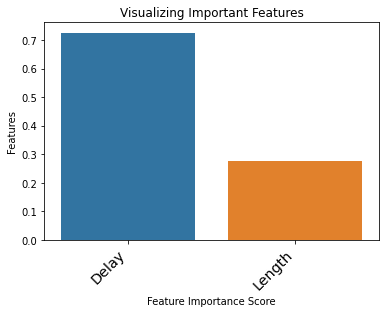

In [ ]:
# visualizar características importantes Random Forest Regressor

# Crear un diagrama de barras
sns.barplot(x=feature_importances_df['feature'], y=feature_importances_df['importance'])
# agregar estiquestas

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

Tal como se puede identificar es imposible saber la duracion del vuelo con la variable del largo del vuelo.
Coefficient of determination es muy bajo es menos del 0,04 para los dos modelos (min = 0, max 1, 1 = modelo perfecto)
El delay tendria que ayudar al modelo, pero no puede ser la variable principal dado que es un valor binario.
Podemos decir que la duracion del vuelo se ve afectado en gran medida por las variables categoricas

# Algoritmos de Agrupamiento

## K-Means

In [ ]:
# se generan las variables a utilizar para el algoritmo. Se utiliza de prueba el precio del algoritmo.
X = df_arbol.Precio_aluminio.values.reshape(-1,1)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Kmeans con k=3
km = KMeans(n_clusters=3, random_state=42)
km.fit_predict(X)
#Cálculo de Silhouette
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8)) #Definimos el tamaño del gráfico
for i in [2, 3, 4, 5]:
    
    #Creando diferentes instancias de kmeans para distinta cantidad de cluster
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    #Visualizamos el índice Silhouette con yellowbrick
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [ ]:
X=df_arbol.Precio_aluminio.values.reshape(-1,1)
y=df_arbol.Rango_alum.values.reshape(-1,1)
# se utiliza el valor de n=3 conseguido.
kmeans = KMeans(n_clusters=3,random_state=15).fit(X)
# se imprime el valor de los centroides.
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
# Visualización gráfica de los clusters
plt.figure(figsize=(14,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## HDBSCAN

In [ ]:
#Instanciamos el algoritmo
hdbscan = HDBSCAN(min_cluster_size=20, min_samples=10)
                 
#Entrenamos y predecimos
preds = hdbscan.fit_predict(df_cluster_hdbscan)

In [ ]:
#Graficamos
df_cluster_hdbscan.plot(kind='scatter', x='x', y='y', c=preds, cmap='Accent_r', figsize=(16,10))